In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [3]:
df = pd.read_csv(data)
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### standardize the columns' names

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
df.dtypes[df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

The above is a series made of indexes and values. We are interested in getting the indexes

In [7]:
df.dtypes[df.dtypes == 'object'].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [8]:
# we can put it in a list, but for no particular reason. 
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [9]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [10]:
df.head(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350


## EDA

In [11]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

#### distribution of price

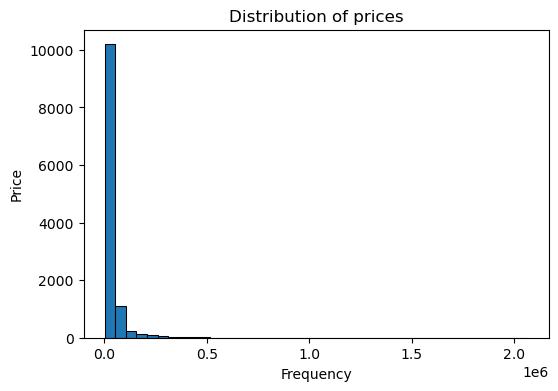

In [12]:
plt.figure(figsize = (6,4))

sns.histplot(df['msrp'], bins = 40, alpha = 1)
plt.xlabel('Frequency')
plt.ylabel('Price')
plt.title('Distribution of prices')
plt.show()

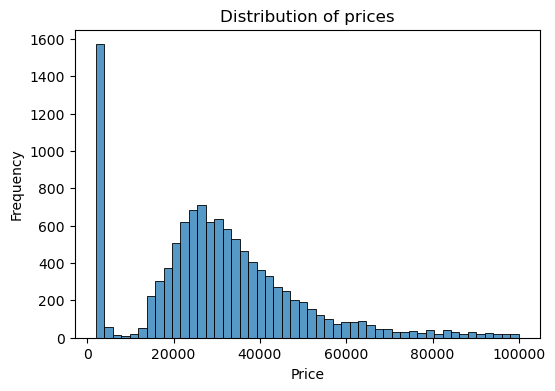

In [13]:
plt.figure(figsize=(6, 4))

sns.histplot(df['msrp'][df['msrp'] < 100000], bins = 50)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

## long-tail distribution --> common in prices, most of the available itens are cheap. This kind of skew distribution is not good for ml, the tail will confuse our model

In [14]:
# log1p adds 1 to all the values, to avoid having zeros in our log function

price_logs = np.log1p(df['msrp'])
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

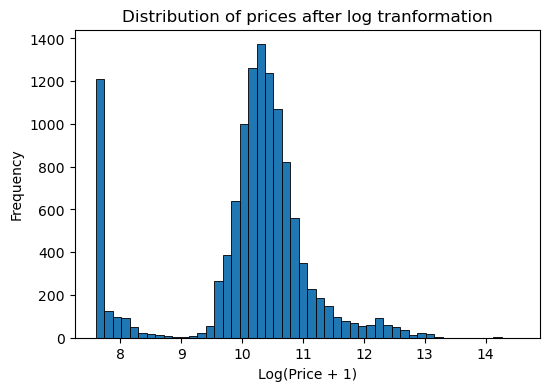

In [15]:
plt.figure(figsize = (6, 4))

sns.histplot(price_logs, bins=50, alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

#### missing values

In [16]:
df.isnull().sum()[df.isnull().sum() > 0]

engine_fuel_type       3
engine_hp             69
engine_cylinders      30
number_of_doors        6
market_category     3742
dtype: int64

## Validation framework

In [17]:
np.random.seed(2)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

# SHUFFLE DATASET
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

# copy to preserve the original data
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [18]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [19]:
y_train_orig = df_train.msrp.values
y_val_orig = df_val.msrp.values
y_test_orig = df_test.msrp.values

y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

## Linear Regression

In [20]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 7557, dtype: object

In [21]:
# engine_ho, city_mpg, popularity
xi = [453, 11, 86]

In [22]:
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [23]:
def linear_regression(xi):
    n = len(xi)
    
    pred = w0
    for j in range(n):
        pred = pred + w[j] * xi[j]
    
    return pred

In [24]:
linear_regression(xi)

12.312

In [25]:
round(np.expm1(12.312), 2)

np.float64(222347.22)

### Linear regression vector form

In [26]:
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]  #vector_vector_multiplication
    
    return res    

In [27]:
def linear_regression(xi):
    return w0 + dot(xi, w) # vector_vector_multiplication --> using numpy's dot multiplication --> x.dot(w) 
    

In [28]:
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [29]:
def linear_regression(xi):
    xi = [1] + xi   # add 1 to multiply the entire w_nem vector, so w0*1, w1*x1, ... 
    return dot(xi, w_new) 
    

In [30]:
linear_regression(xi)

12.312

In [31]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [32]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [33]:
def linear_regression(X):
    return X.dot(w_new)

In [34]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

### Training a linear regression model

In [35]:
X = [
[148, 24, 1385],
[132, 25, 2031],
[453, 11, 86],
[158, 24, 185],
[172, 25, 201],
[413, 11, 86],
[38, 54, 185],
[142, 25, 431],
[453, 31, 86]
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [36]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [37]:
X = np.column_stack([ones, X])
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [38]:
y = [100, 200, 150, 250, 100, 200, 150, 250, 120]

In [39]:
XTX = X.T.dot(X)
XTX

array([[9.000000e+00, 2.109000e+03, 2.300000e+02, 4.676000e+03],
       [2.109000e+03, 6.964710e+05, 4.411500e+04, 7.185400e+05],
       [2.300000e+02, 4.411500e+04, 7.146000e+03, 1.188030e+05],
       [4.676000e+03, 7.185400e+05, 1.188030e+05, 6.359986e+06]])

In [40]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.30686958e+00, -5.39612291e-03, -6.21325581e-02,
        -6.61016816e-04],
       [-5.39612291e-03,  1.11633857e-05,  8.66973393e-05,
         1.08664195e-06],
       [-6.21325581e-02,  8.66973393e-05,  1.46189255e-03,
         8.57849603e-06],
       [-6.61016816e-04,  1.08664195e-06,  8.57849603e-06,
         3.60215866e-07]])

In [41]:
XTX.dot(XTX_inv).round(1) 

array([[ 1., -0., -0.,  0.],
       [-0.,  1., -0.,  0.],
       [-0.,  0.,  1.,  0.],
       [-0., -0., -0.,  1.]])

In [42]:
w_full = XTX_inv.dot(X.T).dot(y)

In [43]:
w0 = w_full[0]
w = w_full[1:]

In [44]:
w0, w

(np.float64(300.06776692555616),
 array([-0.22774253, -2.5769413 , -0.02301206]))

### final function

In [45]:
X = [
[148, 24, 1385],
[132, 25, 2031],
[453, 11, 86],
[158, 24, 185],
[172, 25, 201],
[413, 11, 86],
[38, 54, 185],
[142, 25, 431],
[453, 31, 86]
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [46]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [47]:
train_linear_regression(X, y)

(np.float64(300.06776692555616),
 array([-0.22774253, -2.5769413 , -0.02301206]))

#### baseline model

In [48]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [49]:
df_train.dtypes[df_train.dtypes != 'object']

year                  int64
engine_hp           float64
engine_cylinders    float64
number_of_doors     float64
highway_mpg           int64
city_mpg              int64
popularity            int64
dtype: object

In [50]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
2735,148.0,4.0,33,24,1385
6720,132.0,4.0,32,25,2031
5878,148.0,4.0,37,28,640
11190,90.0,4.0,18,16,873
4554,385.0,8.0,21,15,5657
...,...,...,...,...,...
434,300.0,6.0,31,20,3916
1902,210.0,4.0,30,24,873
9334,285.0,6.0,22,17,549
5284,563.0,12.0,21,13,86


In [51]:
X_train = df_train[base].values
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]], shape=(7150, 5))

In [52]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978], shape=(7150,))

In [53]:
train_linear_regression(X_train, y_train)

(np.float64(nan), array([nan, nan, nan, nan, nan]))

In [54]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [55]:
df_train[base].fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [56]:
X_train = df_train[base].fillna(0).values

In [57]:
w0, w = train_linear_regression(X_train, y_train)

In [58]:
y_pred = w0 + X_train.dot(w)
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111], shape=(7150,))

### put it all together

In [59]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [60]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [61]:
y_pred = w_0 + X_train.dot(w)

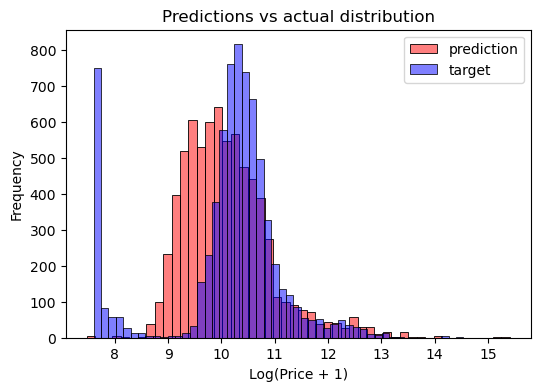

In [62]:
plt.figure(figsize = (6, 4))

sns.histplot(y_pred, label = 'prediction', color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_train, label = 'target', color = 'blue', alpha = 0.5, bins = 50)

plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

### RMSE

In [63]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    
    return np.sqrt(mse)

In [64]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

### Validate the model


- base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

- X_train = df_train[base].fillna(0).values

- w0, w = train_linear_regression(X_train, y_train)

- y_pred = w0 + X_train.dot(w)

In [65]:

def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [66]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.7616530991301587)

### Simple Feature Engineering

In [67]:
df_train.year.max()

2017

In [68]:
def prepare_X(df):
    df = df.copy() # guarantee we are working with a copy inside this function, so we can keep the dataset in its original form
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X



In [69]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation', rmse(y_val, y_pred))

train 0.5175055465840046
validation 0.5172055461058314


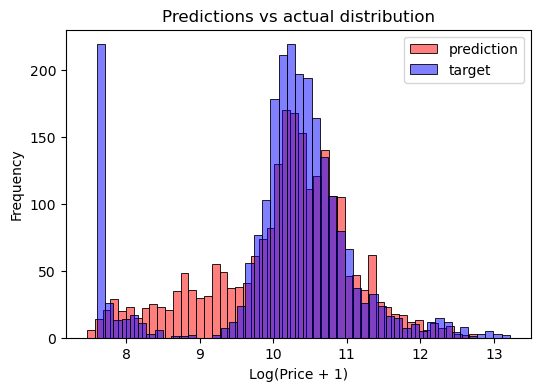

In [70]:
plt.figure(figsize=(6, 4))


sns.histplot(y_pred, label='prediction', color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_val, label='target', color = 'blue', alpha = 0.5, bins = 50)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

### Categorical variables

In [71]:
(df_train.number_of_doors == 2).astype('int')

2735     1
6720     0
5878     0
11190    0
4554     0
        ..
434      1
1902     1
9334     0
5284     0
2420     0
Name: number_of_doors, Length: 7150, dtype: int64

In [72]:
for v in [2, 3, 4]:
    df_train['num_doors_%s' % v] = (df_train.number_of_doors == v).astype('int') 

In [73]:
df_train.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1,0,0
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0,0,1


In [74]:
df['make'].value_counts().head(5) # get the top 5 manufactors

make
chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: count, dtype: int64

In [75]:
list(df['make'].value_counts().head().index)

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [77]:
df['market_category'].value_counts().head(5)

market_category
crossover             1110
flex_fuel              872
luxury                 855
luxury,performance     673
hatchback              641
Name: count, dtype: int64

We can explore all available categorical columns

In [80]:
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)

In [81]:
categorical

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'model': ['silverado_1500', 'tundra', 'f-150', 'sierra_1500', 'tacoma'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'hatchback',
  'luxury,performance'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [82]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v) 

    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [84]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 463.73099232327644
validation: 334.2592703935773


In [85]:
w0, w

(np.float64(7.927257388070121),
 array([ 3.33402330e-01, -2.64632896e+02, -3.08258349e+01, -1.14637163e+01,
        -3.07296194e-02, -1.81592207e+01,  1.00645737e+04,  9.70175024e+03,
         9.79298670e+03, -2.77488265e+01,  2.36082928e+01,  5.95677415e-01,
         2.01085256e+02, -5.75550718e+00, -6.47816843e+01, -1.45982531e+02,
        -7.77082941e+00, -1.60328603e+02, -1.22916827e+03, -1.31506129e+03,
        -1.21951046e+03, -1.33419975e+03, -1.17073524e+03, -1.14964687e+03,
        -1.46760260e+16, -1.46760260e+16, -1.46760260e+16, -1.46760260e+16,
         2.55730740e+01,  1.54005601e+01, -6.59865124e+01,  1.22405972e+01,
        -8.47865083e+01,  1.97336487e+02,  3.38920603e+02,  3.40801522e+02,
        -1.44115660e-01, -2.62579827e-02,  1.75913981e-01,  3.65037816e-01,
        -2.90235596e-01]))

### Regularization

Seguir a formula w = XTX_inv.XT.y 
Problema --> por vezes, a inversa da gram matrix XTX não existe. Acontece quando a matrix X, tem features duplicadas, ou seja as colunas são iguais. E neste cenário a inversa de XTX não existe!

In [90]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5],
]

X = np.array(X)

y= [1, 2, 3, 1, 2, 3]

#####################

XTX = X.T.dot(X)

XTX_inv = np.linalg.inv(XTX)



LinAlgError: Singular matrix

Para resolver este problema, somamos um pequeno número à diagonal da matrix XTX

In [91]:
XTX = XTX + 0.01 * np.eye(3)
np.linalg.inv(XTX)


array([[ 3.85624712e-02, -1.98159081e-02, -1.98159081e-02],
       [-1.98159081e-02,  5.00124974e+01, -4.99875026e+01],
       [-1.98159081e-02, -4.99875026e+01,  5.00124974e+01]])

Quando maior for o número que somamos à diagonal, mais controlo temos sobre os coeficientes. Menor são os valores na diagonal da XTX_inv

In [92]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [93]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.4608208286578059)

### Tuning the model

Use the validation set to find the best value for the r parameter, given the rmse score

In [120]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print("r: {:6f} w0: {:12.3E} rmse: {:8.5f}".format(r, w0, score))

r: 0.000000 w0:    1.468E+16 rmse: 334.25927
r: 0.000010 w0:    7.105E+00 rmse:  0.46082
r: 0.000100 w0:    7.146E+00 rmse:  0.46082
r: 0.001000 w0:    7.131E+00 rmse:  0.46082
r: 0.100000 w0:    7.000E+00 rmse:  0.46087
r: 1.000000 w0:    6.251E+00 rmse:  0.46158
r: 10.000000 w0:    4.730E+00 rmse:  0.47261


In [122]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)

print('validation:', score)

validation: 0.4608158581056922


### Using the model

In [123]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

X_full_train = prepare_X(df_full_train)
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]], shape=(9532, 41))

In [124]:
y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 11.21756062,
        9.77542688, 10.1924563 ], shape=(9532,))

In [125]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [126]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

score = rmse(y_test, y_pred)
score

np.float64(0.4600753965823606)

This will be a simulation of an entire new observation. For demonstration purposes, we will just pick one from our test dataset

In [127]:
i = 2
ad = df_test.iloc[i].to_dict()
ad

{'make': 'toyota',
 'model': 'venza',
 'year': 2013,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 268.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'all_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'crossover,performance',
 'vehicle_size': 'midsize',
 'vehicle_style': 'wagon',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [134]:
X_test = prepare_X(pd.DataFrame([ad]))

y_pred = w0 + X_test.dot(w)
y_pred = y_pred[0]


suggestion = np.expm1(y_pred)
suggestion

np.float64(33981.486749665135)

In [137]:
np.expm1(y_test[2]) ## real observation from the test set

np.float64(31119.999999999985)